### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Setting the Parameters

In [2]:
D = 0.20          # initial density of positive opinions 
w = 0.90          # Individuals' risk perception parameter
alpha = 0.1       # Infected -> recovers -> Susceptible 

phi = 0.01        # Resusceptibility probability : vaccinated -> susceptible 
N = 10000         # Population size
mcs = 100         # Monte Carlo steps

In [3]:
lambda_values = [0.1, 0.6, 0.7, 0.8] 

The conditions: <br>
$D~\ge~U(0, 1) $ <br>
$\gamma ~ \ge ~ U(0, 1)$ <br>
$\phi ~ \ge ~ U(0, 1)$ <br>
$\alpha ~ \ge ~ U(0, 1)$ <br>
$\lambda ~ \ge ~ U(0, 1)$ 

### Initializing some agents as infected at t = 0
> using fluxogram condition for susceptible to infected

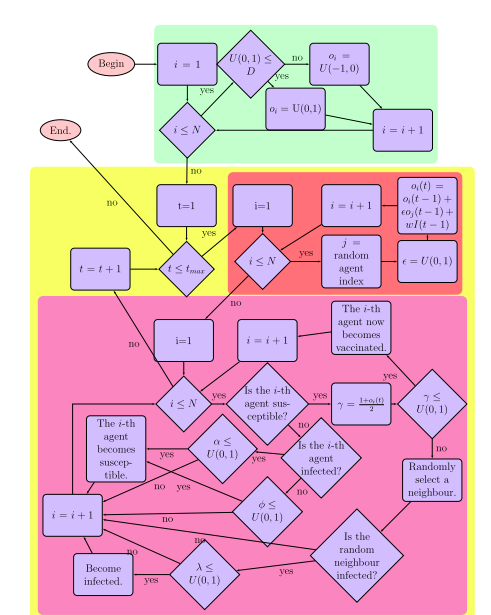

In [248]:

def simulate(lambda_value):
    # Initialize epidemic compartments
    opinions = np.zeros(N)
    for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine

    susceptible = np.ones(N)
    infected = np.zeros(N)
    # setting some random agents as infected
    random_indices = np.random.randint(0, N, 10)
    for i in random_indices:
        infected[i] = 1
        susceptible[i] = 0

    vaccinated = np.zeros(N)
    
    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    # run the simulations
    for k in range(0, mcs):
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)
        
        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.mean(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            if susceptible[i] == 1:
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                     # Susceptible -> Infected transition
                elif infected[np.random.randint(N)] == 1 and np.random.uniform(0, 1) <= lambda_value:
                    infected[i] = 1
                    susceptible[i] = 0
                
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion


/tmp/ipykernel_16270/600304980.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


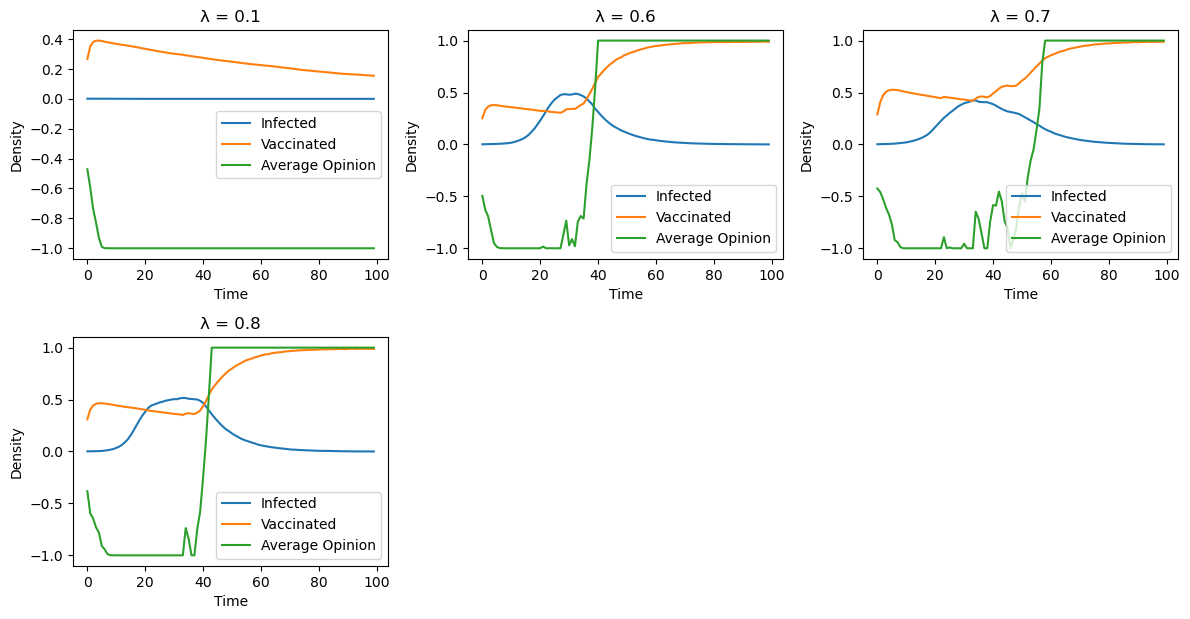

In [249]:
# Simulate and get time series data for different lambda values
plt.figure(figsize=(12, 12))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(4, 3, idx + 1)
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()


## Baseline Simulation 
> using second definition of S -> I

In [246]:

def simulate(lambda_value):
    # Initialize epidemic compartments
    opinions = np.zeros(N)
    for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine

    susceptible = np.ones(N)
    infected = np.zeros(N)
    # setting some random agents as infected
    random_indices = np.random.randint(0, N, 10)
    for i in random_indices:
        infected[i] = 1
        susceptible[i] = 0

    vaccinated = np.zeros(N)
    
    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    for k in range(0, mcs):
        # print("mcs \n", k)
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)

        # print("# of infected ", np.sum(infected))
        # print("# of vaccinated ", np.sum(vaccinated))
        # print("# of susceptible ", np.sum(susceptible))
        # print("\n")

        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.mean(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            # print("susceptible ")
            # print(susceptible[i])
            # print("\n")

            if susceptible[i] == 1:
                # print("gamma " , gamma[i])
                # print("val " , ((1 - gamma[i]) * 0.1 * np.sum(infected)) )
                # print("\n")
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                     # Susceptible -> Infected transition
                elif np.random.uniform(0, 1) <= ((1 - gamma[i]) * lambda_value * np.mean(infected)): #lambda dependent
                    # print("Infection")
                    infected[i] = 1
                    susceptible[i] = 0
                    
                
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion




#### Visualization

/tmp/ipykernel_16270/405418415.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


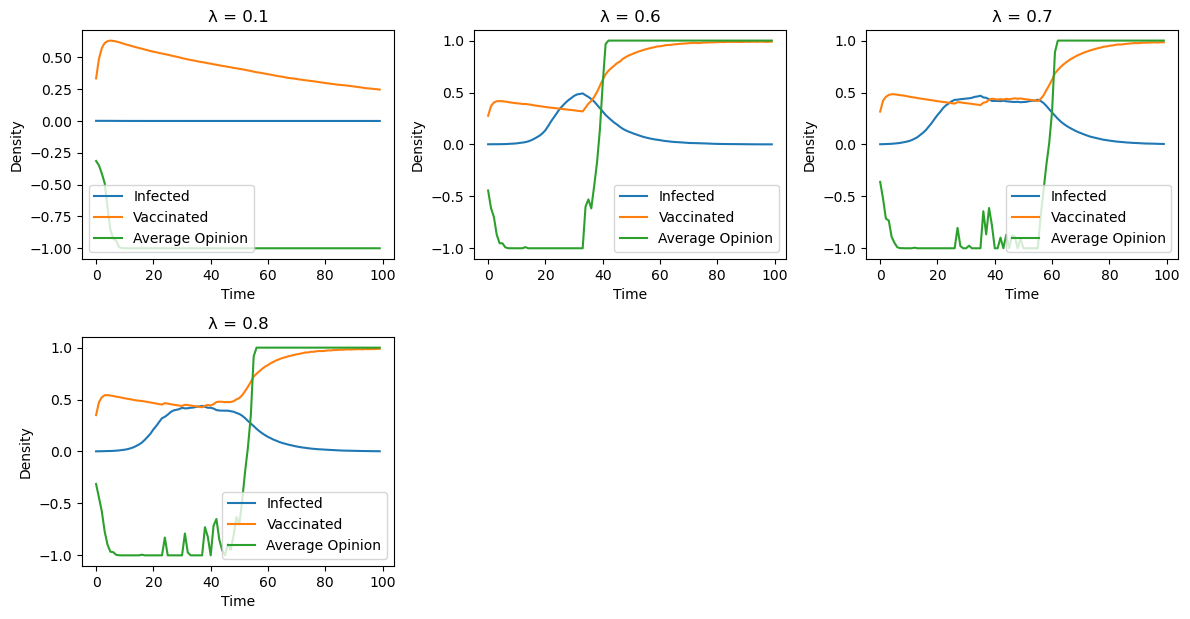

In [247]:
# Simulate and get time series data for different lambda values
plt.figure(figsize=(12, 12))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(4, 3, idx + 1)
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()

### Validation

In [226]:
opinions = np.zeros(N)
for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine
opinions

array([-0.21362568, -0.34004295,  0.17567862, ..., -0.46925554,
       -0.88032357, -0.63409458])

In [227]:
susceptible = np.ones(N)
susceptible

array([1., 1., 1., ..., 1., 1., 1.])

In [228]:
infected = np.zeros(N)
infected

array([0., 0., 0., ..., 0., 0., 0.])

In [229]:
random_indices = np.random.randint(0, N, 10)
random_indices

array([4759, 7862, 1053, 3935,  257, 1065, 5595, 2880, 8389, 3469])

In [230]:
for i in random_indices:
    infected[i] = 1
    susceptible[i] = 0

In [231]:
vaccinated = np.zeros(N)

In [232]:
time_series_infected = []
time_series_vaccinated = []
time_series_average_opinion = []

In [251]:
lambda_value = 0.6

In [250]:
for k in range(0, mcs):
        print("mcs \n", k)
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)

        print("# of infected ", np.sum(infected))
        print("# of vaccinated ", np.sum(vaccinated))
        print("# of susceptible ", np.sum(susceptible))
        print("\n")

        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.mean(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            # print("susceptible ")
            # print(susceptible[i])
            # print("\n")

            if susceptible[i] == 1:
                # print("gamma " , gamma[i])
                # print("val " , ((1 - gamma[i]) * 0.1 * np.sum(infected)) )
                # print("\n")
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                     # Susceptible -> Infected transition
                elif np.random.uniform(0, 1) <= ((1 - gamma[i]) * lambda_value * np.mean(infected)): #lambda dependent
                    # print("Infection")
                    infected[i] = 1
                    susceptible[i] = 0
                    
                
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)

mcs 
 0
# of infected  7.0
# of vaccinated  9902.0
# of susceptible  91.0


mcs 
 1
# of infected  6.0
# of vaccinated  9902.0
# of susceptible  92.0


mcs 
 2
# of infected  6.0
# of vaccinated  9898.0
# of susceptible  96.0


mcs 
 3
# of infected  6.0
# of vaccinated  9896.0
# of susceptible  98.0


mcs 
 4
# of infected  4.0
# of vaccinated  9890.0
# of susceptible  106.0


mcs 
 5
# of infected  3.0
# of vaccinated  9889.0
# of susceptible  108.0


mcs 
 6
# of infected  3.0
# of vaccinated  9904.0
# of susceptible  93.0


mcs 
 7
# of infected  3.0
# of vaccinated  9876.0
# of susceptible  121.0


mcs 
 8
# of infected  2.0
# of vaccinated  9883.0
# of susceptible  115.0


mcs 
 9
# of infected  1.0
# of vaccinated  9907.0
# of susceptible  92.0


mcs 
 10
# of infected  1.0
# of vaccinated  9909.0
# of susceptible  90.0


mcs 
 11
# of infected  1.0
# of vaccinated  9890.0
# of susceptible  109.0


mcs 
 12
# of infected  1.0
# of vaccinated  9896.0
# of susceptible  103.0


mcs

In [235]:
new_opinions

array([1., 1., 1., ..., 1., 1., 1.])

/tmp/ipykernel_16270/1422540710.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


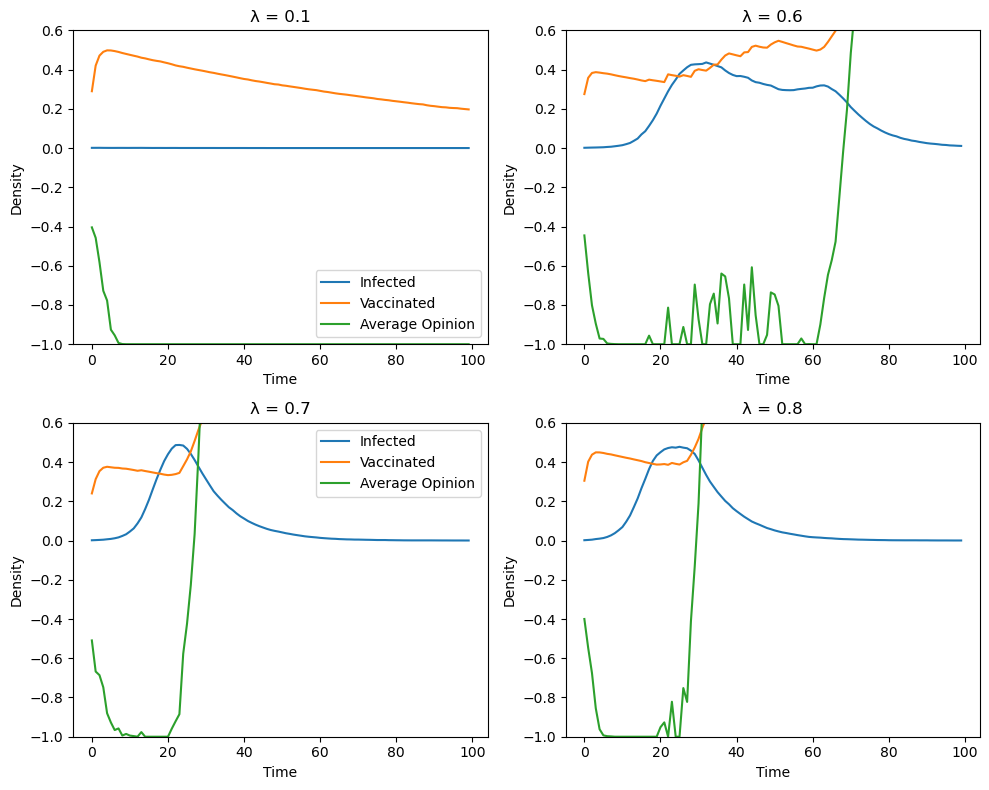

In [253]:
# Plotting the simulation results for different lambda values
plt.figure(figsize=(10, 8))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(2, 2, idx + 1)  # Adjusted the subplot index calculation
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.ylim(-1, 0.6)  # Set y-axis limits for infected and vaccinated
    if idx % 2 == 0:
        plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()


## Erdos Renyi Graph Simulation

In [37]:
import networkx as nx

In [62]:
D = 0.20          # Initial density of positive opinions 
w = 0.90          # Individuals' risk perception parameter
alpha = 0.1       # Infected -> recovers -> Susceptible 
phi = 0.01        # Resusceptibility probability: vaccinated -> susceptible 
N = 10000         # Population size
mcs = 100         # Monte Carlo steps

In [63]:
lambda_values = [0.1, 0.6, 0.7, 0.8] 

In [84]:
def generate_graph(N, p):
    # Generate a random graph using the ER model
    G = nx.fast_gnp_random_graph(N, p, seed=42)
    # Get the adjacency matrix
    A = nx.adjacency_matrix(G)
    # Convert the sparse matrix to a NumPy array
    A = A.toarray()
    # make the neighbors of each node
    neighbors_list = [list(G.neighbors(node)) for node in range(N)]
    return A, neighbors_list

In [85]:
def simulate_on_ER(lambda_value, alpha, phi, D, w, N, mcs, neighbors_list, A):
    # Initialize epidemic compartments
    opinions = np.zeros(N)

    opinions = np.where(np.random.uniform(0, 1, N) <= D, np.random.uniform(0, 1, N), np.random.uniform(-1, 0, N))
    susceptible = np.ones(N)
    infected = np.zeros(N)
    vaccinated = np.zeros(N)

    # setting some random agents as infected
    random_indices = np.random.randint(0, N, 10)
    infected[random_indices] = 1
    susceptible[random_indices] = 0

    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    for k in range(mcs):
        print("mcs \n", k)
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0, 1]
        new_opinions = np.zeros(N)

        print("# of infected ", np.sum(infected))
        print("# of vaccinated ", np.sum(vaccinated))
        print("# of susceptible ", np.sum(susceptible))
        print("\n")

        # Opinion dynamics
        for i in range(N):
            sum_neighbor_opinions = 0 # Sum of opinions of neighbors
            sum_neighbor_infected_proportion = 0 # Sum of neighbors proportion of infected neighbors
            neighbors_of_i = neighbors_list[i]   # Get neighbors of node i
            sum_neighbor_opinions = sum(A[i][j] * opinions[j] for j in neighbors_of_i)
            
            for j in neighbors_of_i:
                neighbors_of_j = neighbors_list[j]
                if len(neighbors_of_j) > 0:
                    sum_neighbor_infected_proportion += (A[i][j] * np.sum(infected[neighbors_of_j])/len(neighbors_of_j))
                else :
                    sum_neighbor_infected_proportion += 0

            # Calculate the new opinion for node i
            degree = max(len(neighbors_of_i), 1)
            new_opinions[i] = opinions[i] + (epsilon / degree) * sum_neighbor_opinions + (w / degree) * sum_neighbor_infected_proportion
           

            # Check upper and lower bounds for opinions
            new_opinions[i] = max(-1, min(1, new_opinions[i]))

        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            neighbors_of_i = neighbors_list[i]   # Get neighbors of node i
            if susceptible[i] == 1:
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                # Susceptible -> Infected transition
                elif len(neighbors_of_i) > 0:
                    neighbor = np.random.choice(neighbors_of_i)  # Randomly select a neighbor
                    if infected[neighbor] == 1 and np.random.uniform(0, 1) <= lambda_value:
                        infected[i] = 1
                        susceptible[i] = 0

            if infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1

            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion


In [86]:
def visualize(lambda_values, alpha, phi, D, w, N, mcs, neighbors_list, A):
    # Plotting the simulation results for different lambda values
    plt.figure(figsize=(10, 8))

    for idx, lambda_val in enumerate(lambda_values):
        infected_series, vaccinated_series, opinion_series = simulate_on_ER(lambda_val, alpha, phi, D, w, N, mcs, neighbors_list, A)
        plt.subplot(2, 2, idx + 1)  
        plt.plot(infected_series, label='Infected')
        plt.plot(vaccinated_series, label='Vaccinated')
        plt.plot(opinion_series, label='Average Opinion')
        plt.xlabel('Time')
        plt.ylabel('Density')
        plt.ylim(-1, 0.6)  # Set y-axis limits for infected and vaccinated
        if idx % 2 == 0:
            plt.legend()
        plt.title(f'λ = {lambda_val}')
        plt.tight_layout()

    plt.show()

In [89]:
def pipe(N, alpha, phi, D, w, mcs, lambda_values):
    # Generate a random graph using the ER model
    A, neighbors_list = generate_graph(N, 0.001)
    visualize(lambda_values, alpha, phi, D, w, N, mcs, neighbors_list, A)
    

mcs 
 0
# of infected  10.0
# of vaccinated  0.0
# of susceptible  9990.0


mcs 
 1
# of infected  11.0
# of vaccinated  2936.0
# of susceptible  7053.0


mcs 
 2
# of infected  10.0
# of vaccinated  4236.0
# of susceptible  5754.0


mcs 
 3
# of infected  10.0
# of vaccinated  4531.0
# of susceptible  5459.0


mcs 
 4
# of infected  9.0
# of vaccinated  4671.0
# of susceptible  5320.0


mcs 
 5
# of infected  7.0
# of vaccinated  4668.0
# of susceptible  5325.0


mcs 
 6
# of infected  7.0
# of vaccinated  4641.0
# of susceptible  5352.0


mcs 
 7
# of infected  6.0
# of vaccinated  4602.0
# of susceptible  5392.0


mcs 
 8
# of infected  6.0
# of vaccinated  4553.0
# of susceptible  5441.0


mcs 
 9
# of infected  4.0
# of vaccinated  4509.0
# of susceptible  5487.0


mcs 
 10
# of infected  4.0
# of vaccinated  4463.0
# of susceptible  5533.0


mcs 
 11
# of infected  5.0
# of vaccinated  4422.0
# of susceptible  5573.0


mcs 
 12
# of infected  2.0
# of vaccinated  4374.0
# of susc

/tmp/ipykernel_5502/1968820743.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


mcs 
 0
# of infected  10.0
# of vaccinated  0.0
# of susceptible  9990.0


mcs 
 1
# of infected  14.0
# of vaccinated  3446.0
# of susceptible  6540.0


mcs 
 2
# of infected  18.0
# of vaccinated  4364.0
# of susceptible  5618.0


mcs 
 3
# of infected  25.0
# of vaccinated  4597.0
# of susceptible  5378.0


mcs 
 4
# of infected  25.0
# of vaccinated  4596.0
# of susceptible  5379.0


mcs 
 5
# of infected  28.0
# of vaccinated  4569.0
# of susceptible  5403.0


mcs 
 6
# of infected  38.0
# of vaccinated  4516.0
# of susceptible  5446.0


mcs 
 7
# of infected  54.0
# of vaccinated  4466.0
# of susceptible  5480.0


mcs 
 8
# of infected  67.0
# of vaccinated  4416.0
# of susceptible  5517.0


mcs 
 9
# of infected  98.0
# of vaccinated  4374.0
# of susceptible  5528.0


mcs 
 10
# of infected  133.0
# of vaccinated  4334.0
# of susceptible  5533.0


mcs 
 11
# of infected  166.0
# of vaccinated  4282.0
# of susceptible  5552.0


mcs 
 12
# of infected  197.0
# of vaccinated  4238

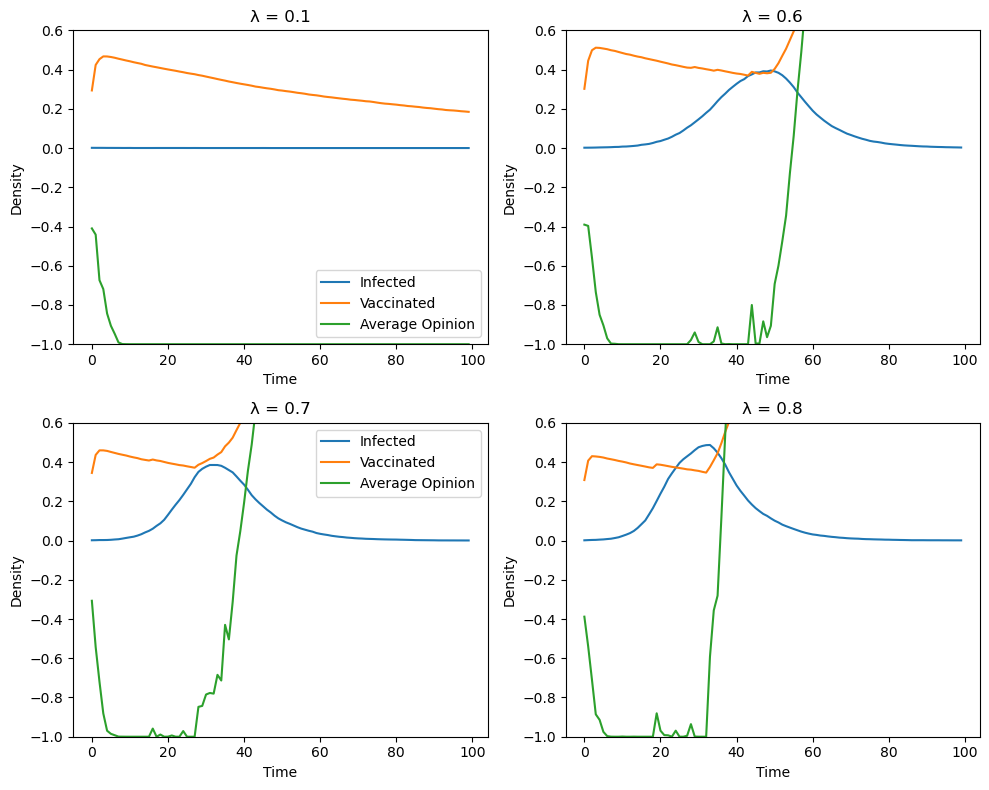

In [90]:
pipe(N, alpha, phi, D, w, mcs, lambda_values)

### Validation

In [91]:
G = nx.fast_gnp_random_graph(10000, 0.001, seed=42)

In [58]:
# Use Fruchterman-Reingold layout for visualization
pos = nx.spring_layout(G, iterations=50)

In [92]:
print("Maximum degree:", max(dict(G.degree()).values()))

Maximum degree: 27


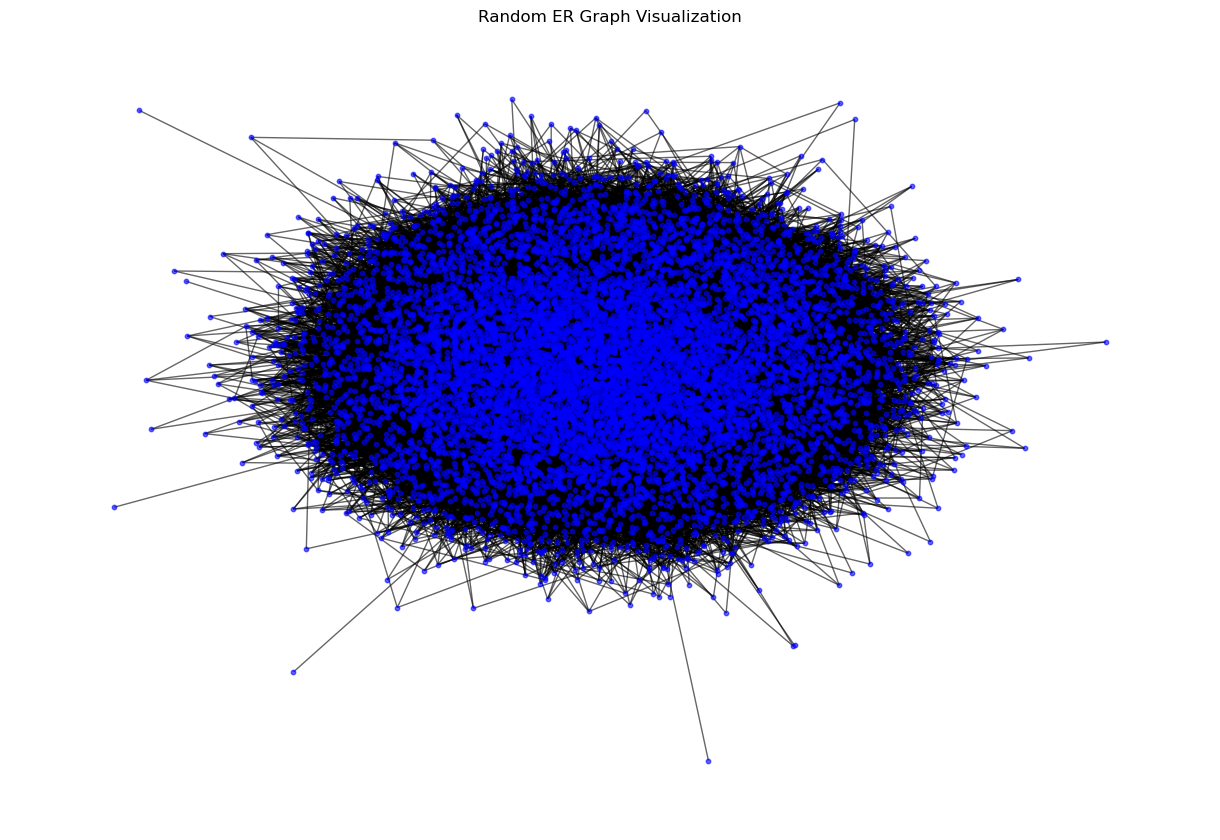

In [59]:
# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_size=10, node_color='b', alpha=0.6, with_labels=False)
plt.title("Random ER Graph Visualization")
plt.show()

In [71]:
# Get the adjacency matrix
A = nx.adjacency_matrix(G)
# Convert the sparse matrix to a NumPy array
A = A.toarray()

# make the neighbors of each node
neighbors_list = [list(G.neighbors(node)) for node in range(N)]

In [72]:
len(neighbors_list)

10000

mcs 
 0
# of infected  10.0
# of vaccinated  0.0
# of susceptible  9990.0


mcs 
 1
# of infected  9.0
# of vaccinated  3286.0
# of susceptible  6705.0


mcs 
 2
# of infected  8.0
# of vaccinated  4338.0
# of susceptible  5654.0


mcs 
 3
# of infected  8.0
# of vaccinated  4795.0
# of susceptible  5197.0


mcs 
 4
# of infected  10.0
# of vaccinated  5075.0
# of susceptible  4915.0


mcs 
 5
# of infected  9.0
# of vaccinated  5075.0
# of susceptible  4916.0


mcs 
 6
# of infected  9.0
# of vaccinated  5054.0
# of susceptible  4937.0


mcs 
 7
# of infected  9.0
# of vaccinated  5017.0
# of susceptible  4974.0


mcs 
 8
# of infected  8.0
# of vaccinated  4959.0
# of susceptible  5033.0


mcs 
 9
# of infected  8.0
# of vaccinated  4906.0
# of susceptible  5086.0


mcs 
 10
# of infected  8.0
# of vaccinated  4859.0
# of susceptible  5133.0


mcs 
 11
# of infected  8.0
# of vaccinated  4814.0
# of susceptible  5178.0


mcs 
 12
# of infected  7.0
# of vaccinated  4762.0
# of suscep

/tmp/ipykernel_5502/1968820743.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


mcs 
 0
# of infected  10.0
# of vaccinated  0.0
# of susceptible  9990.0


mcs 
 1
# of infected  16.0
# of vaccinated  3139.0
# of susceptible  6845.0


mcs 
 2
# of infected  20.0
# of vaccinated  3959.0
# of susceptible  6021.0


mcs 
 3
# of infected  33.0
# of vaccinated  4406.0
# of susceptible  5561.0


mcs 
 4
# of infected  38.0
# of vaccinated  4616.0
# of susceptible  5346.0


mcs 
 5
# of infected  47.0
# of vaccinated  4612.0
# of susceptible  5341.0


mcs 
 6
# of infected  62.0
# of vaccinated  4614.0
# of susceptible  5324.0


mcs 
 7
# of infected  71.0
# of vaccinated  4568.0
# of susceptible  5361.0


mcs 
 8
# of infected  93.0
# of vaccinated  4538.0
# of susceptible  5369.0


mcs 
 9
# of infected  111.0
# of vaccinated  4493.0
# of susceptible  5396.0


mcs 
 10
# of infected  133.0
# of vaccinated  4448.0
# of susceptible  5419.0


mcs 
 11
# of infected  154.0
# of vaccinated  4405.0
# of susceptible  5441.0


mcs 
 12
# of infected  167.0
# of vaccinated  436

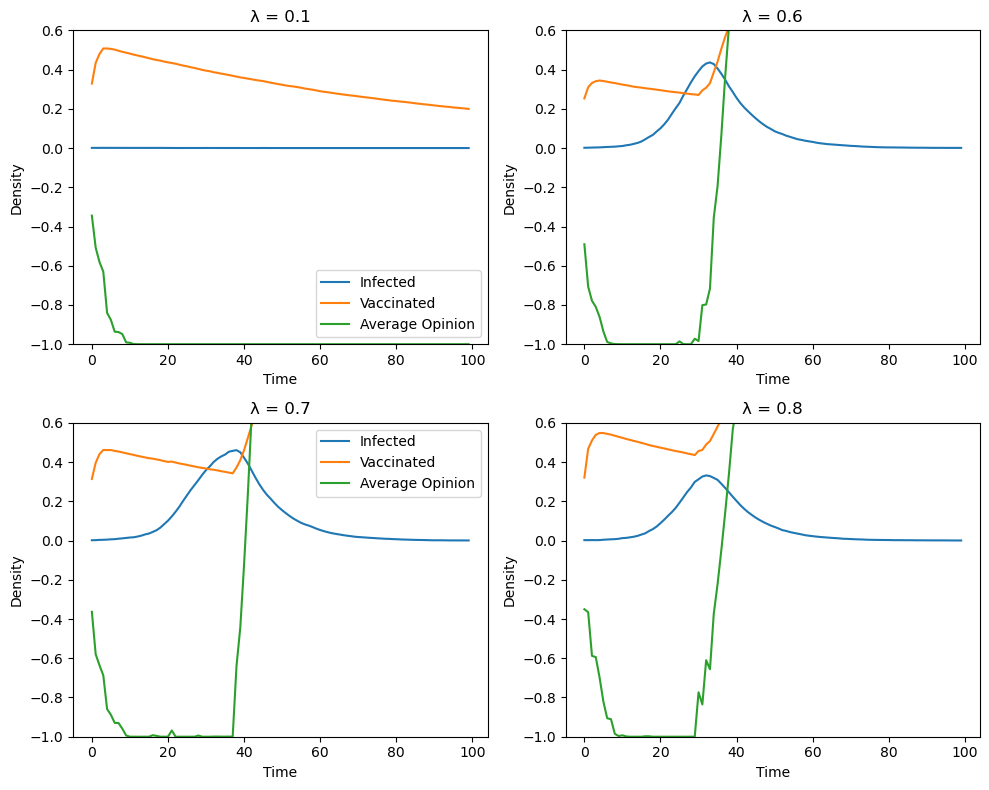

In [88]:
visualize(lambda_values, alpha, phi, D, w, N, mcs, neighbors_list, A)